In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix


import warnings;
warnings.filterwarnings('ignore');

from openpyxl import load_workbook
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from xgboost import XGBClassifier

Load Train Data

In [2]:
df_train = pd.read_csv("train_dataset.csv")
df_train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [3]:
df_train.dropna(how="all",inplace=True)

In [4]:
df_train.isna().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [5]:
df_train.shape

(5180, 22)

In [6]:
df_train['Attrition'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

Load Test Data

In [7]:
df_test = pd.read_csv('Test_dataset.csv')
df_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [8]:
df_test.isna().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [9]:
df_test.shape

(2630, 21)

Analyse Train Data

In [10]:
df_train.duplicated().sum()

0

EDA

In [11]:
attrition = (df_train['Attrition'].value_counts()).to_frame()
attrition

,Attrition
0.0,3735
1.0,1445


The data is imbalanced

([<matplotlib.patches.Wedge at 0x210810d42b0>,
 [Text(-0.7039383692584005, 0.8452637294275817, '0.0'),
  Text(0.7039382901190956, -0.8452637953350447, '1.0')],
 [Text(-0.3839663832318548, 0.4610529433241354, '72.10%'),
  Text(0.38396634006496116, -0.4610529792736607, '27.90%')])

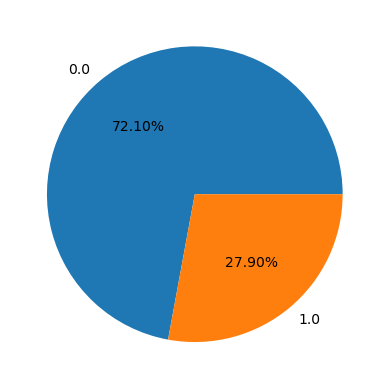

In [12]:
plt.pie(attrition['Attrition'],labels=attrition.index,autopct='%1.2f%%')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

Type casting attributes to the desired Type

In [14]:
df_train['Involvement'] = df_train['Involvement'].astype('object')
df_train['JobSatisfaction'] = df_train['JobSatisfaction'].astype('object')
df_train['WorkLifeBalance'] = df_train['WorkLifeBalance'].astype('object')
df_train['OverTime'] = df_train['OverTime'].astype('object')
df_train['Attrition'] = df_train['Attrition'].astype('object')
df_train['ESOPs'] = df_train['ESOPs'].astype('object')

In [15]:
num_cols = df_train.select_dtypes(include=np.number)
num_cols.head()

,EmployeeID,Age,HomeToWork,HourlnWeek,NumCompaniesWorked,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,5110001.0,35.0,5.0,69.0,1.0,20.0,7.0,2.0,NaN,18932.0
1,5110002.0,32.0,5.0,62.0,8.0,20.0,4.0,1.0,NaN,18785.0
2,5110003.0,31.0,5.0,45.0,3.0,26.0,12.0,1.0,3.0,22091.0
3,5110004.0,34.0,10.0,32.0,1.0,23.0,5.0,1.0,3.0,20302.0
4,5110005.0,37.0,27.0,49.0,8.0,21.0,12.0,1.0,9.0,21674.0


In [16]:
cat_cols = df_train.select_dtypes(include='object')
cat_cols.head()

,Attrition,TravelProfile,Department,EducationField,Gender,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,OverTime,MaritalStatus
0,0.0,Rarely,Analytics,CA,Male,1.0,1.0,Executive,1.0,1.0,1.0,M
1,1.0,Yes,Sales,Statistics,Female,4.0,3.0,Executive,2.0,0.0,0.0,Single
2,0.0,Rarely,Analytics,Statistics,F,5.0,3.0,Manager,2.0,1.0,0.0,Single
3,0.0,Yes,Sales,Statistics,Female,3.0,2.0,Manager,4.0,1.0,0.0,Divorsed
4,0.0,No,Analytics,Statistics,Female,3.0,4.0,Manager,4.0,1.0,0.0,Divorsed


Handling Null Values in the train Data 

In [17]:
df_train.describe()

,EmployeeID,Age,HomeToWork,HourlnWeek,NumCompaniesWorked,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,5.180000e+03,4864.000000,4925.000000,4893.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,5.112590e+06,37.108553,11.107411,57.979767,3.157336,20.649371,11.165832,2.552838,4.385295,21692.296442
std,1.495482e+03,9.248647,8.455577,12.996674,2.606036,3.706469,7.797783,3.234467,3.617643,4770.637922
min,5.110001e+06,18.000000,1.000000,10.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111296e+06,30.000000,5.000000,49.000000,1.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,5.112590e+06,36.000000,9.000000,59.000000,2.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,5.113885e+06,43.000000,16.000000,67.000000,5.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,5.115180e+06,61.000000,121.000000,99.000000,21.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


In [18]:
df_train.skew()

EmployeeID            0.000000
Attrition             0.986012
Age                   0.426449
HomeToWork            1.269843
HourlnWeek           -0.215049
Involvement          -0.518513
WorkLifeBalance      -0.020089
JobSatisfaction      -0.145593
ESOPs                 0.037856
NumCompaniesWorked    1.126677
OverTime              0.804191
SalaryHikelastYear    0.778944
WorkExperience        1.148334
LastPromotion         1.973214
CurrentProfile        0.802114
MonthlyIncome         1.996463
dtype: float64

The skewness of Age attribute is between -0.5 to 0.5, hence replacing the null values by the mean value

In [19]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age,inplace=True)

Replacing null in Department with the Mode value

In [20]:
df_train['Department'].value_counts()

Analytics    3219
Sales        1615
Marketing     222
Name: Department, dtype: int64

In [21]:
mode_dept = df_train['Department'].mode()
df_train['Department'].fillna(mode_dept[0],inplace=True)

Replacing null in HomeToWork with the median value

In [22]:
median_htw = df_train['HomeToWork'].median()
df_train['HomeToWork'].fillna(median_htw,inplace=True)

Replacing null in Gender with the mode value

In [23]:
df_train['Gender'].value_counts()

Male      3094
Female    1338
F          702
Name: Gender, dtype: int64

In [24]:
df_train['Gender'].replace({'F':'Female'},inplace=True)

In [25]:
df_train['Gender'].value_counts()

Male      3094
Female    2040
Name: Gender, dtype: int64

In [26]:
mode_gen = df_train['Gender'].mode()
df_train['Gender'].fillna(mode_gen[0],inplace=True)

In [27]:
mean_hiw = df_train['HourlnWeek'].mean()
df_train['HourlnWeek'].fillna(mean_hiw,inplace=True)

In [28]:
df_train['Designation'].value_counts()

Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: Designation, dtype: int64

In [29]:
mode_desg = df_train['Designation'].mode()
df_train['Designation'].fillna(mode_desg[0],inplace=True)

In [30]:
median_skl = df_train['SalaryHikelastYear'].median()
df_train['SalaryHikelastYear'].fillna(median_skl,inplace=True)

In [31]:
median_wk = df_train['WorkExperience'].median()
df_train['WorkExperience'].fillna(median_wk,inplace=True)

In [32]:
median_lp = df_train['LastPromotion'].median()
df_train['LastPromotion'].fillna(median_lp,inplace=True)

In [33]:
median_cp = df_train['CurrentProfile'].median()
df_train['CurrentProfile'].fillna(median_cp,inplace=True)

In [34]:
median_mi = df_train['MonthlyIncome'].median()
df_train['MonthlyIncome'].fillna(median_mi,inplace=True)

In [35]:
df_train.isna().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [36]:
for c in cat_cols.columns:
    print(df_train[c].value_counts())

0.0    3735
1.0    1445
Name: Attrition, dtype: int64
Rarely    3637
Yes       1051
No         492
Name: TravelProfile, dtype: int64
Analytics    3343
Sales        1615
Marketing     222
Name: Department, dtype: int64
Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: EducationField, dtype: int64
Male      3140
Female    2040
Name: Gender, dtype: int64
3.0    3030
4.0    1355
1.0     361
5.0     325
2.0     109
Name: Involvement, dtype: int64
4.0    1060
3.0    1054
5.0    1033
1.0    1027
2.0    1006
Name: WorkLifeBalance, dtype: int64
Executive         2110
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: Designation, dtype: int64
3.0    1560
5.0    1095
4.0     965
1.0     847
2.0     713
Name: JobSatisfaction, dtype: int64
0.0    2639
1.0    2541
Name: ESOPs, dtype: int64
0.0    3556
1.0    1624
Name: OverTime, dtype: int64


In [37]:
df_train['MaritalStatus'].value_counts()

Single      1776
Married     1614
Divorsed    1016
M            774
Name: MaritalStatus, dtype: int64

In [38]:
df_train['MaritalStatus'].replace({'M':'Married'},inplace=True)

In [39]:
df_train['MaritalStatus'].value_counts()

Married     2388
Single      1776
Divorsed    1016
Name: MaritalStatus, dtype: int64

In [91]:
df_train.to_csv("train.csv")

In [41]:
pal_2 = sns.color_palette("GnBu",n_colors=2)

In [42]:
def count_Plot(feature, data,xl,yl,axs,hu=None):
    ax = sns.countplot(x=feature,palette=pal_2, data=data,hue=hu,ax=axs)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()),  ha='center', va='center', size=18)
    axs.set(xlabel=xl, ylabel=yl)

In [43]:
def pie_plot(feature,data,xl,axs):
    co = data[feature].value_counts(normalize=True)
    labels = ['Employee Stay','Employee Quit']
#   colors = sns.color_palette('bright')[0:5]
    
    axs.pie(co, labels = labels, colors=pal_2,autopct='%.0f%%')
    axs.set(xlabel=xl)

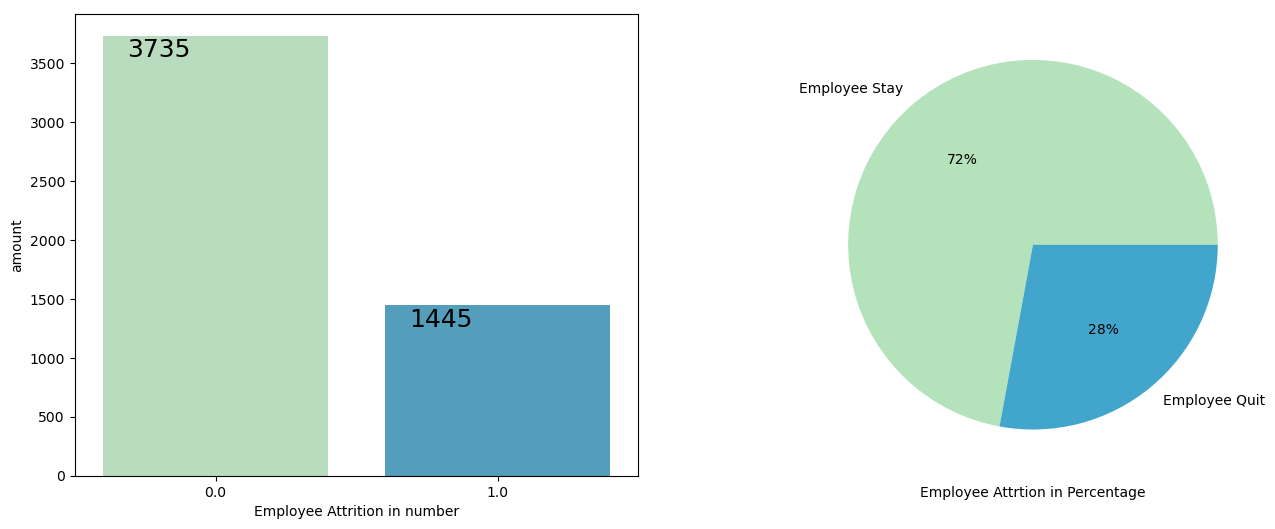

In [44]:
fig, axes = plt.subplots(1,2, figsize=(16, 6))
count_Plot("Attrition",df_train,"Employee Attrition in number","amount",axes[0])
pie_plot('Attrition',df_train,"Employee Attrtion in Percentage",axes[1])
# plt.show()

<iframe  height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="HR_EmployeeAttrition"></iframe>

### Uni Variate numerical Feature Analysis

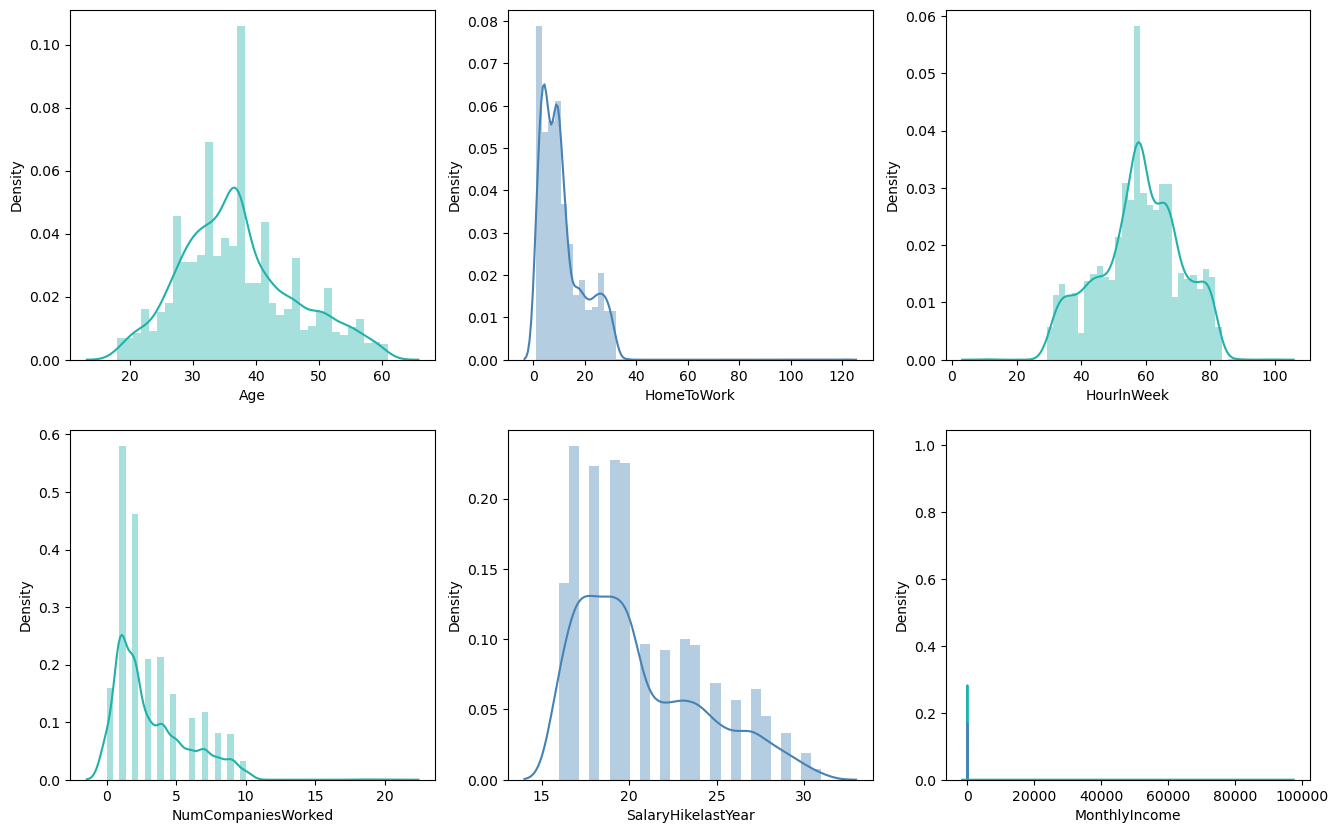

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.distplot(x=df_train['Age'], kde=True,ax=axes[0,0],axlabel='Age',color='lightseagreen')
sns.distplot(x=df_train['HomeToWork'], kde=True,ax=axes[0,1],axlabel='HomeToWork',color='steelblue')
sns.distplot(x=df_train['HourlnWeek'], kde=True,ax=axes[0,2],axlabel='HourlnWeek',color='lightseagreen')
sns.distplot(x=df_train['NumCompaniesWorked'], kde=True,ax=axes[1,0],axlabel='NumCompaniesWorked',color='lightseagreen')
sns.distplot(x=df_train['SalaryHikelastYear'], kde=True,ax=axes[1,1],axlabel='SalaryHikelastYear',color='steelblue')
sns.distplot(x=df_train['WorkExperience'], kde=True,ax=axes[1,2],axlabel='WorkExperience',color='steelblue')
sns.distplot(x=df_train['LastPromotion'], kde=True,ax=axes[1,2],axlabel='LastPromotion',color='lightseagreen')
sns.distplot(x=df_train['CurrentProfile'], kde=True,ax=axes[1,2],axlabel='CurrentProfile',color='steelblue')
sns.distplot(x=df_train['MonthlyIncome'], kde=True,ax=axes[1,2],axlabel='MonthlyIncome',color='lightseagreen')
plt.show()


### Bi Variate Catagorical Feature Analysis

In [46]:
pal_7 = sns.color_palette("GnBu",n_colors=7)

In [47]:
cata=[]
feat = df_train.drop(['Attrition'],axis=1)
# for colu in X.columns:
for colu in feat:
    pa =df_train[colu].value_counts().count()
    if (pa>1) & (pa<10) :
        cata.append(colu)

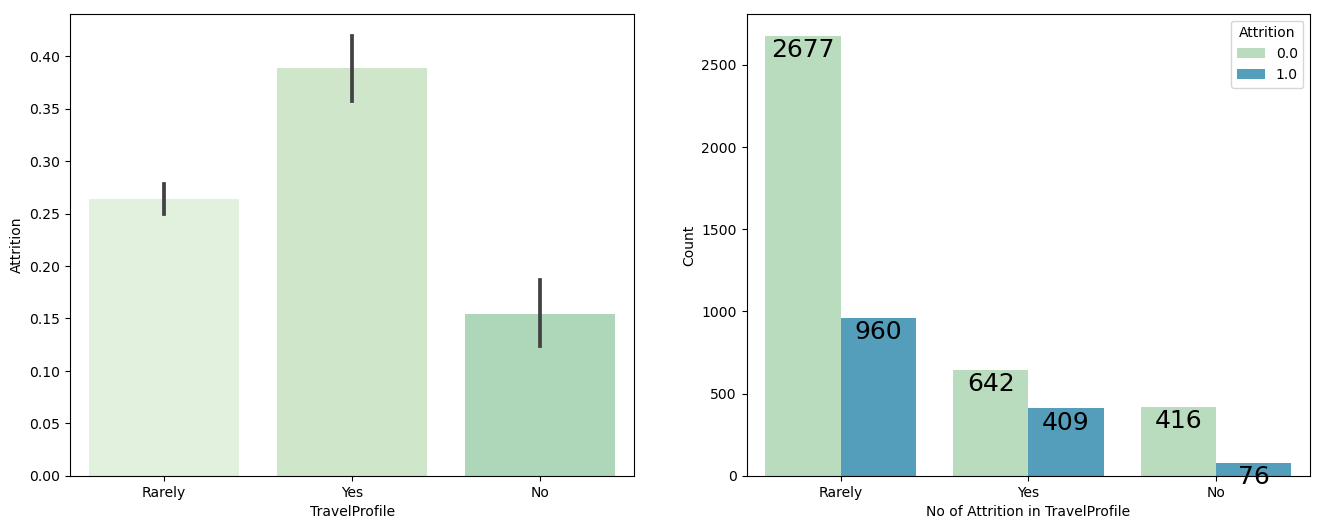

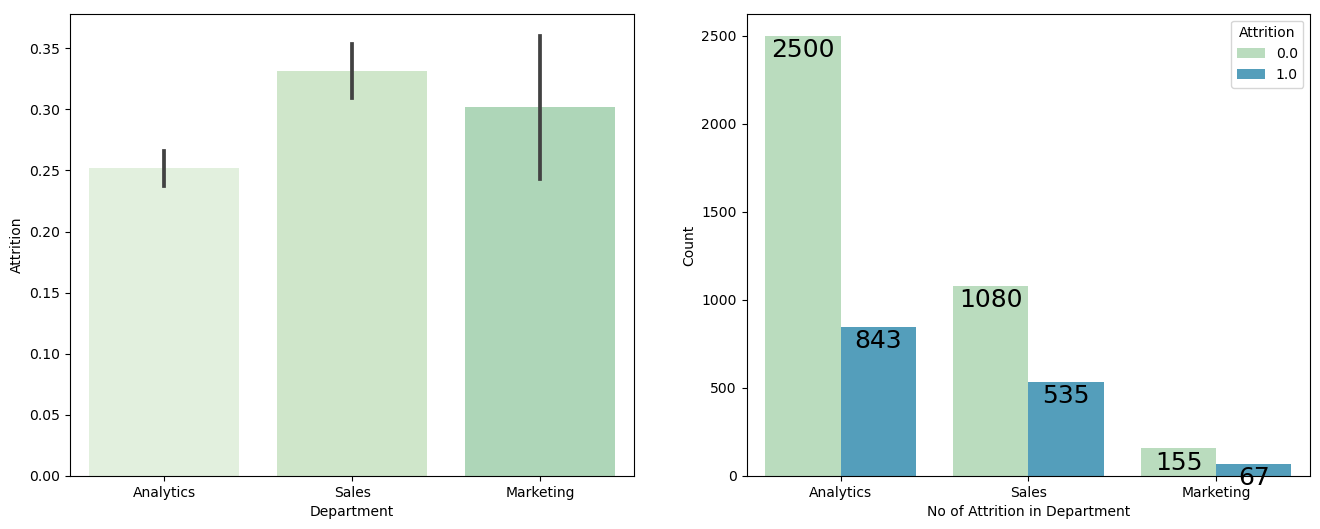

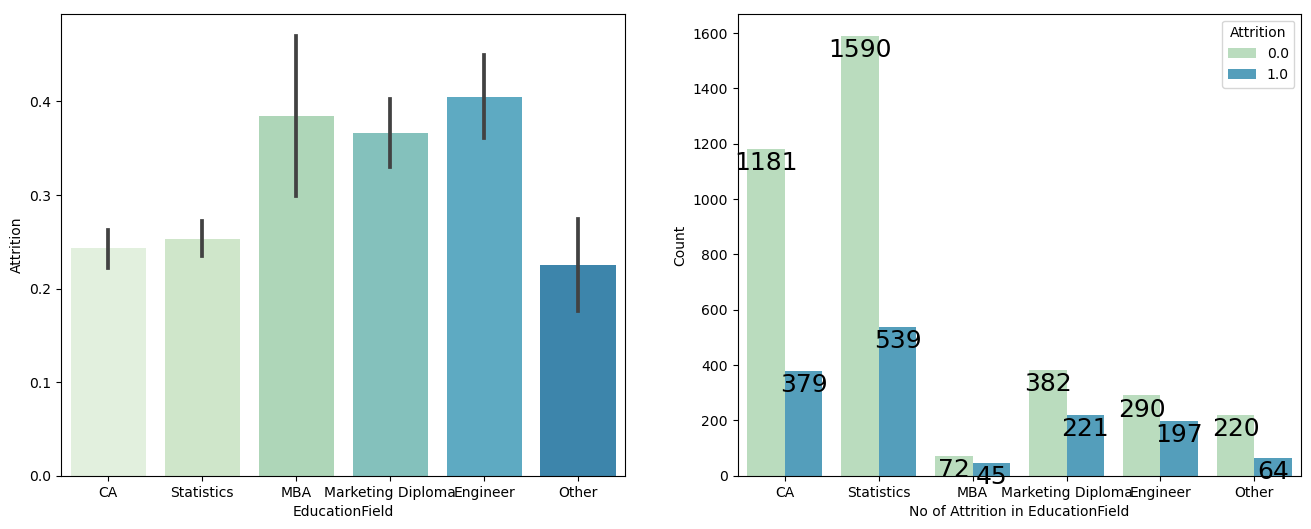

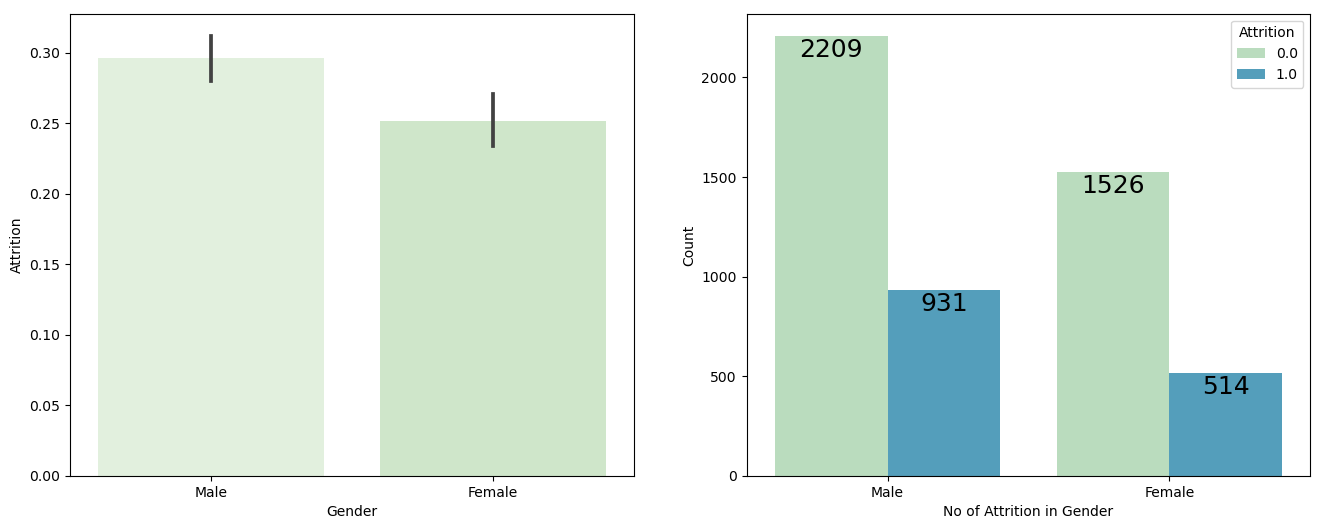

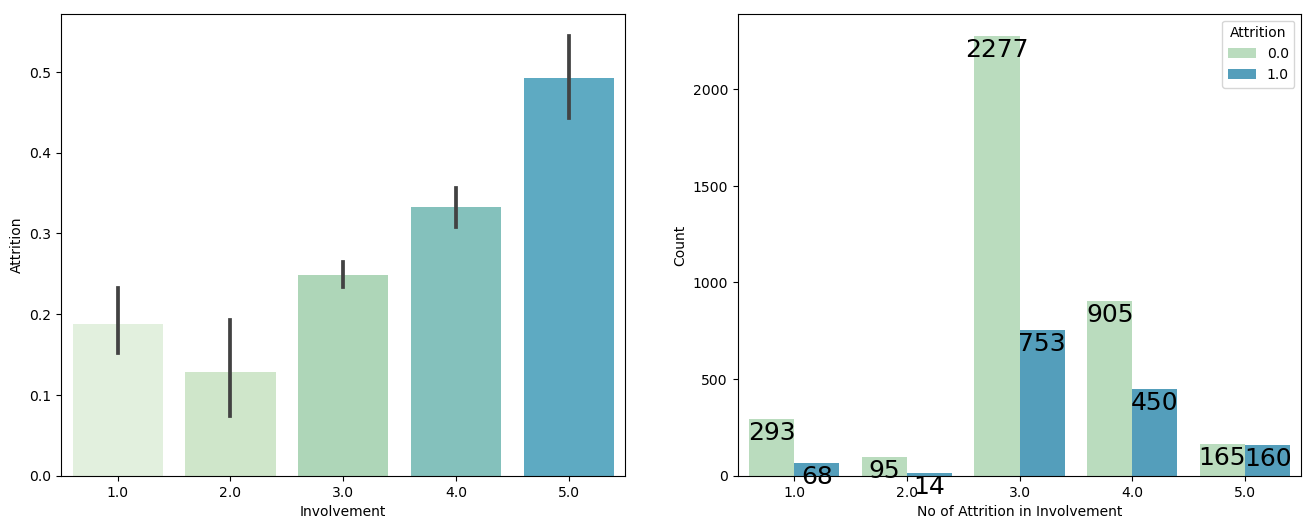

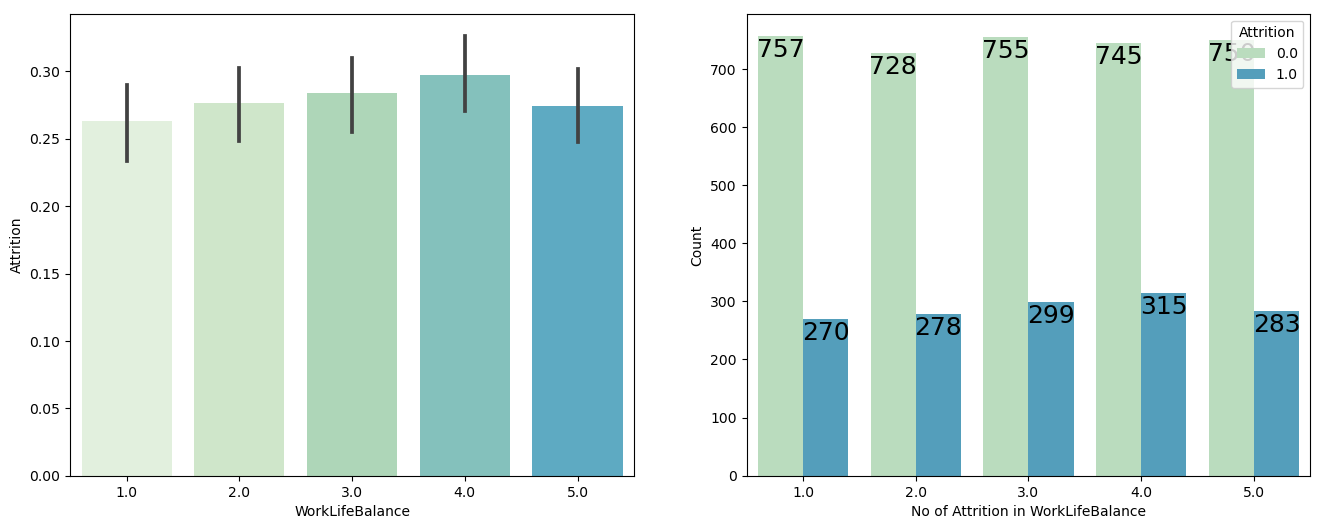

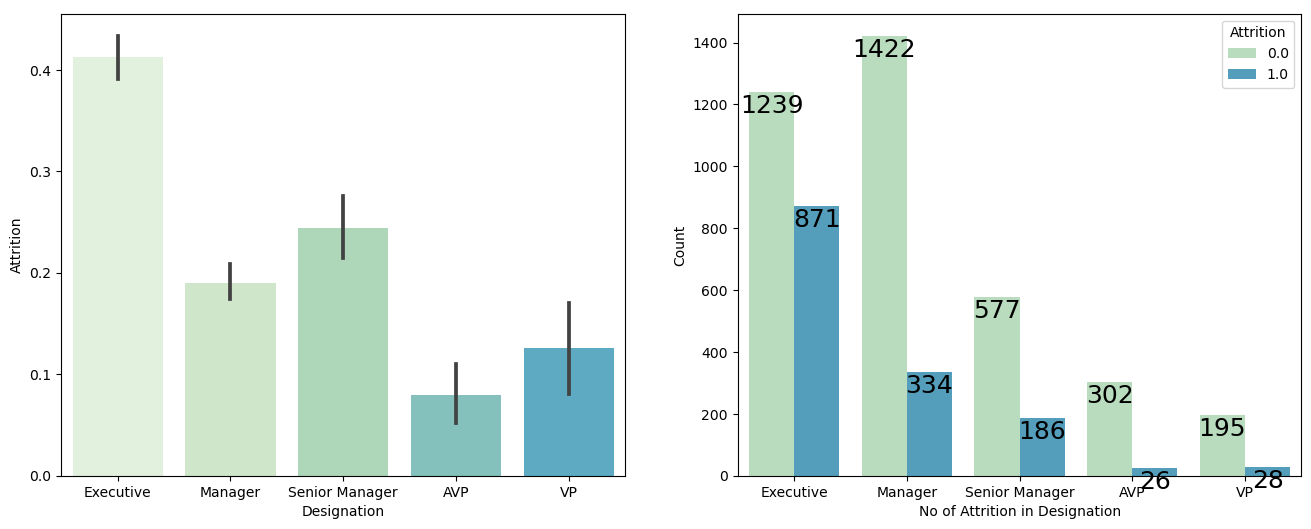

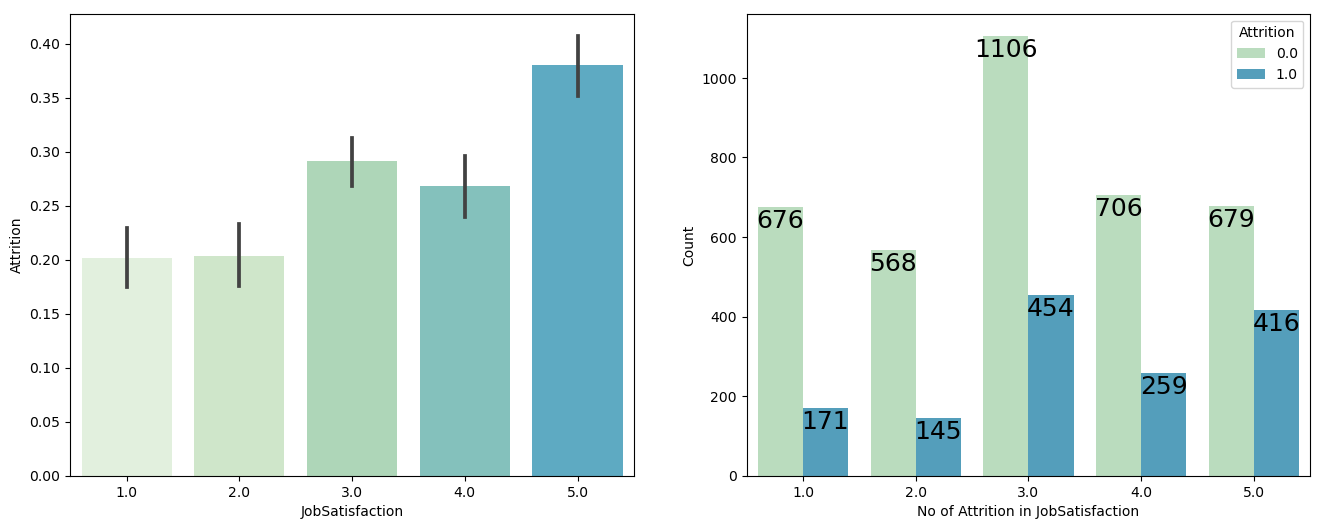

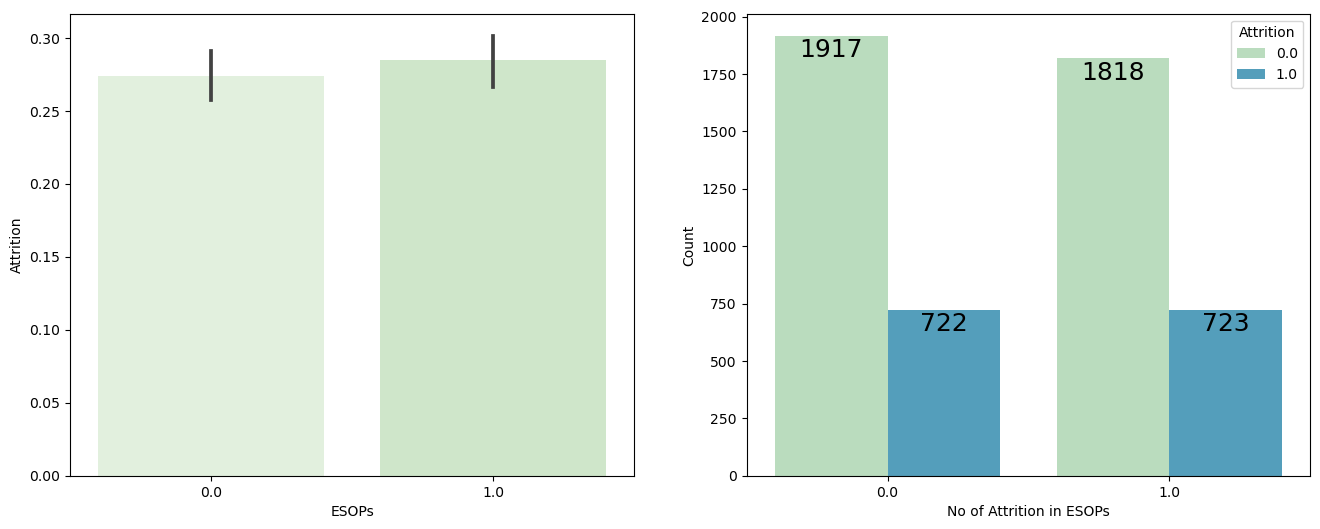

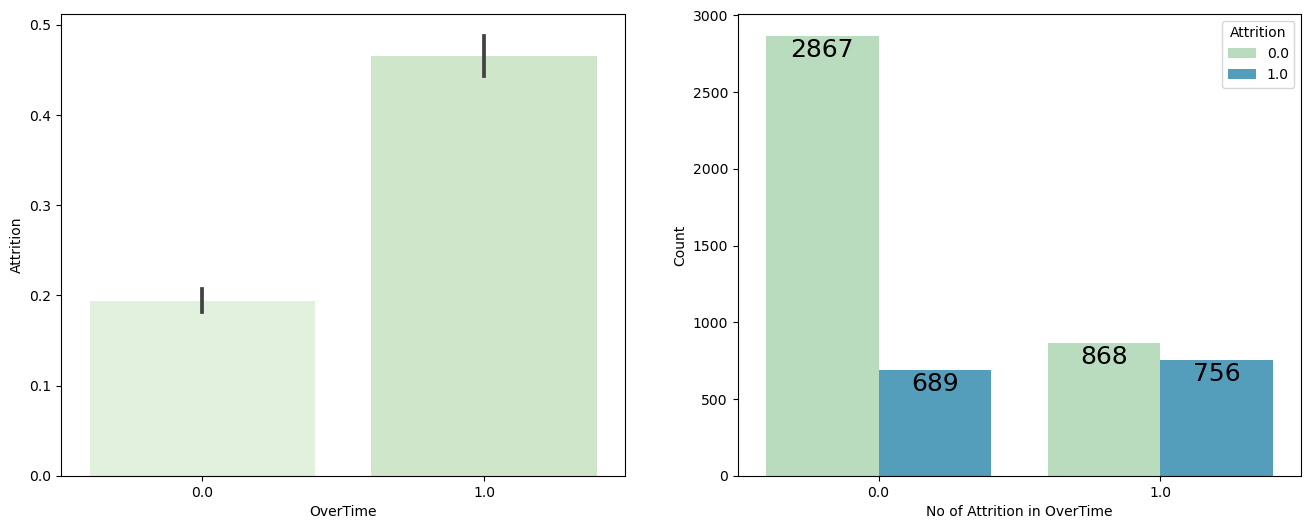

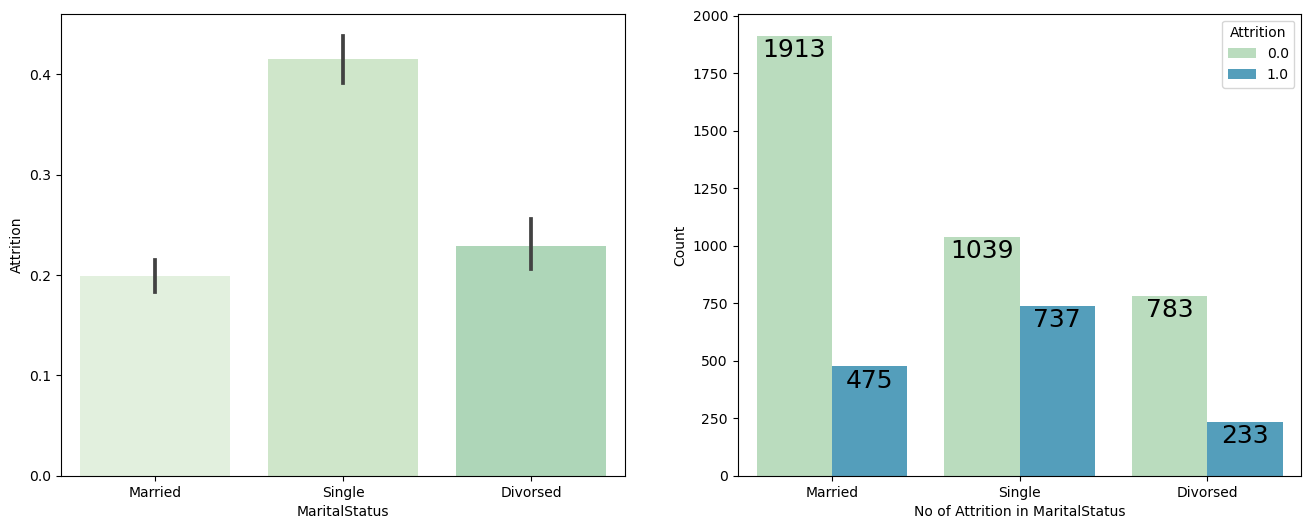

In [48]:
for col in cata:        
    fig, axes = plt.subplots(1,2, figsize=(16, 6))
    sns.barplot(x=col,y='Attrition',data=df_train,ax=axes[0],palette=pal_7)
    st ="No of Attrition in "+col
    count_Plot(col,df_train,st,"Count",axes[1],'Attrition')
plt.show()

### Multi Variate Feature Analysis

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

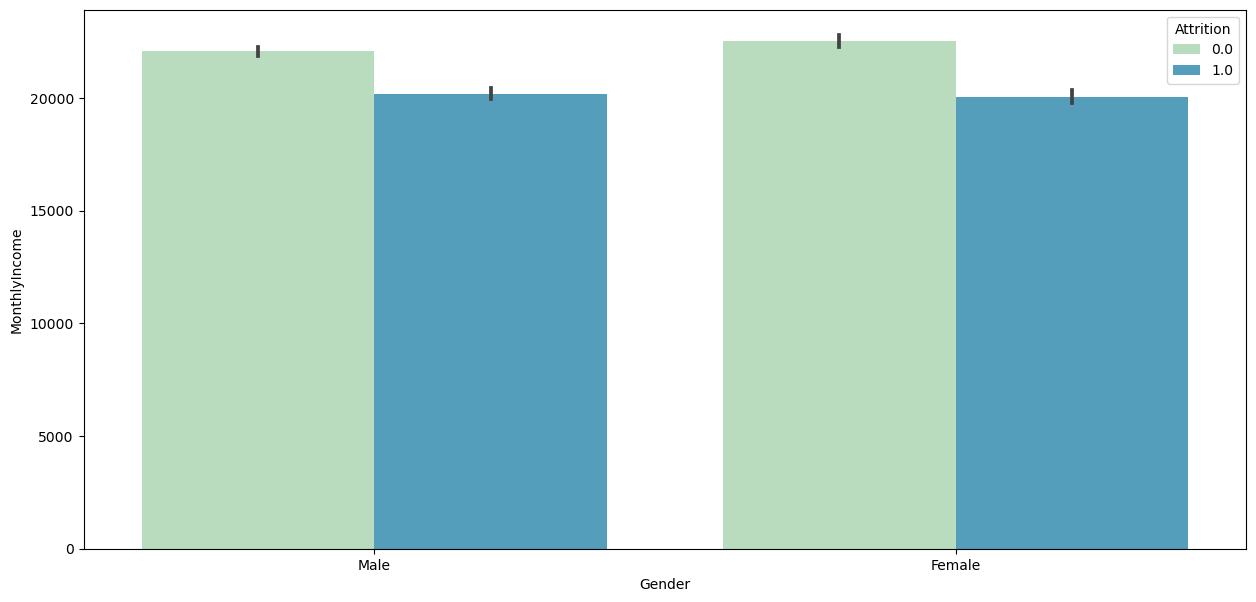

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(x="Gender", y="MonthlyIncome", data=df_train,hue='Attrition',palette=pal_2)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

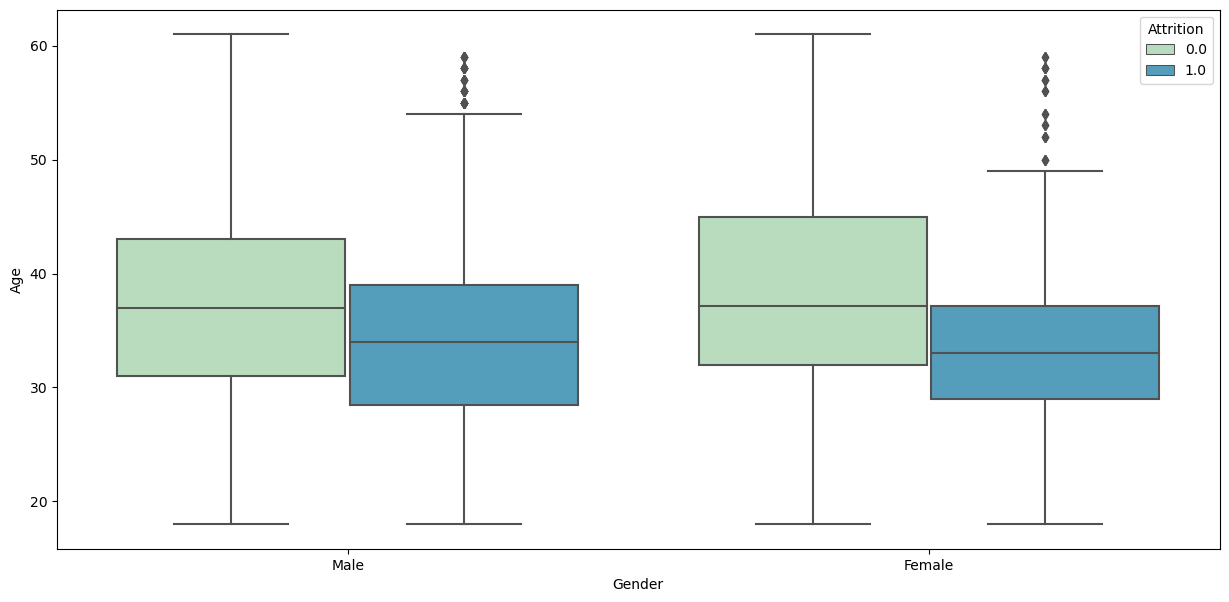

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Gender", y="Age", data=df_train,hue='Attrition',palette=pal_2)

In [51]:
df_train.groupby('Gender')['Attrition'].mean().to_frame()

,Attrition
Gender,
Female,0.251961
Male,0.296497


In [52]:
df_train.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Gender Attrition               
Female 0.0         22513.237877
       1.0         20059.850195
Male   0.0         22076.259846
       1.0         20183.856069

In [53]:
df_train.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
Gender Attrition               
Female 0.0              20799.0
       1.0              18743.0
Male   0.0              20304.0
       1.0              18909.0

In [54]:
df_train.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

Age
Gender Attrition           
Female 0.0        38.776008
       1.0        33.704479
Male   0.0        37.633379
       1.0        35.009536

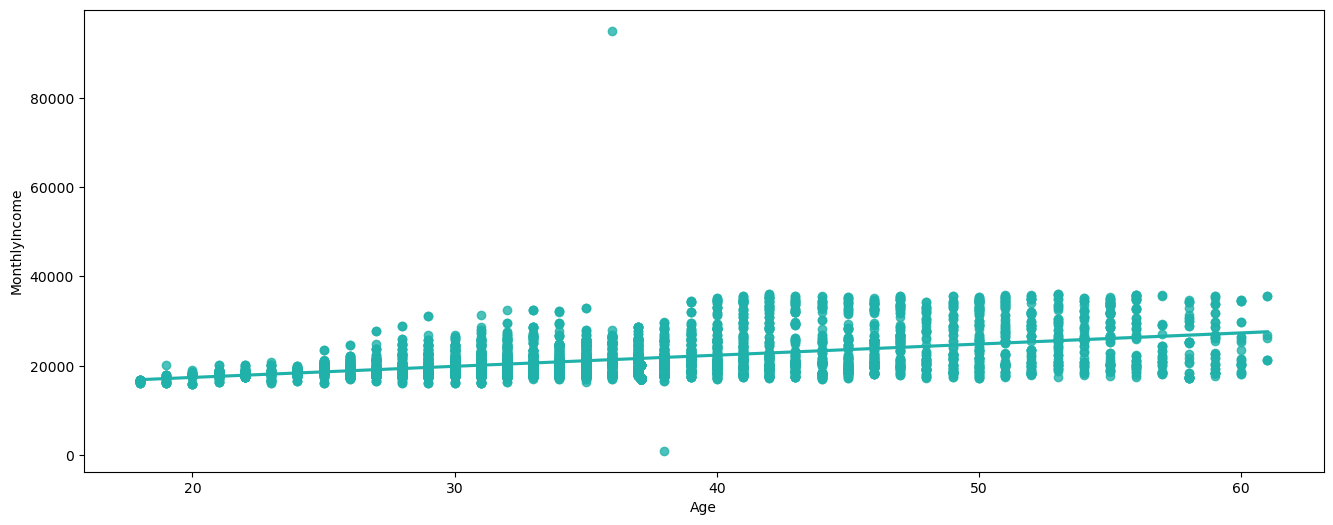

In [55]:
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = df_train,color='lightseagreen')
plt.show()

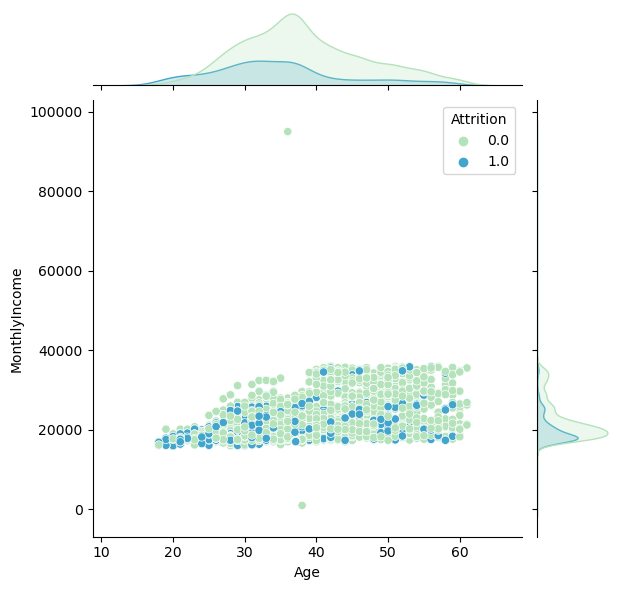

In [56]:
sns.jointplot(x='Age',y='MonthlyIncome',data=df_train,hue='Attrition',palette=pal_2)
plt.show()

In [57]:
df_train.groupby(['Attrition'])['Age'].mean().to_frame()

,Age
Attrition,
0.0,38.100220
1.0,34.545315


In [58]:
df_train.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
Attrition,
0.0,22254.794913
1.0,20139.746021


<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

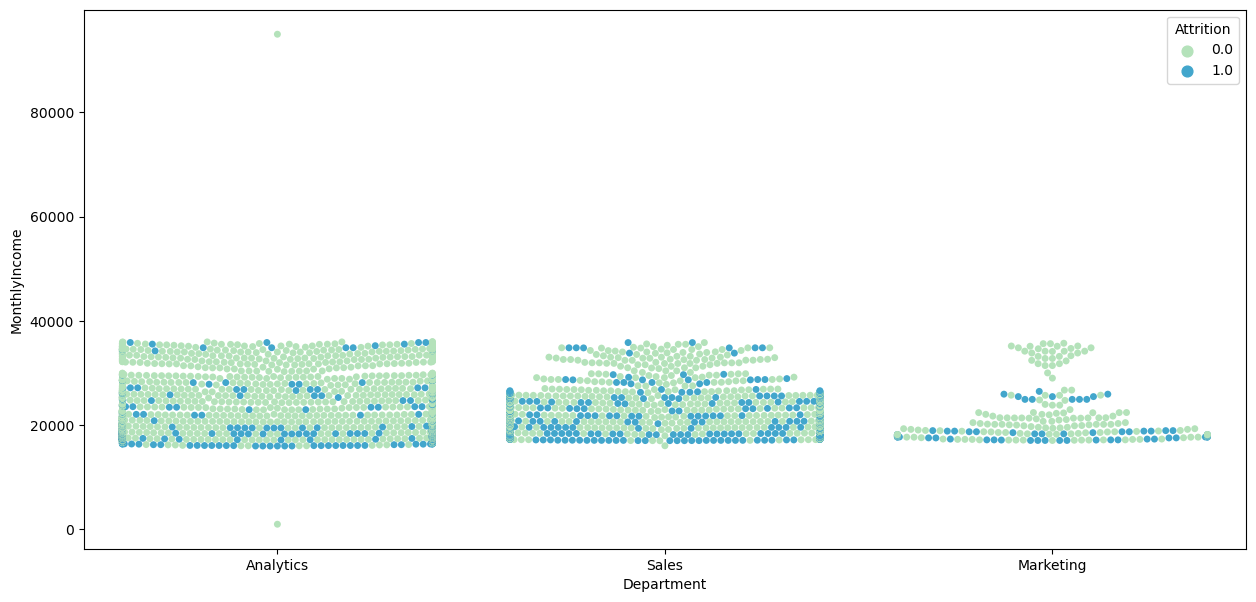

In [59]:
plt.figure(figsize=(15,7))
sns.swarmplot( x="Department", y='MonthlyIncome',data=df_train,hue='Attrition',palette=pal_2)

<AxesSubplot:xlabel='Department', ylabel='HomeToWork'>

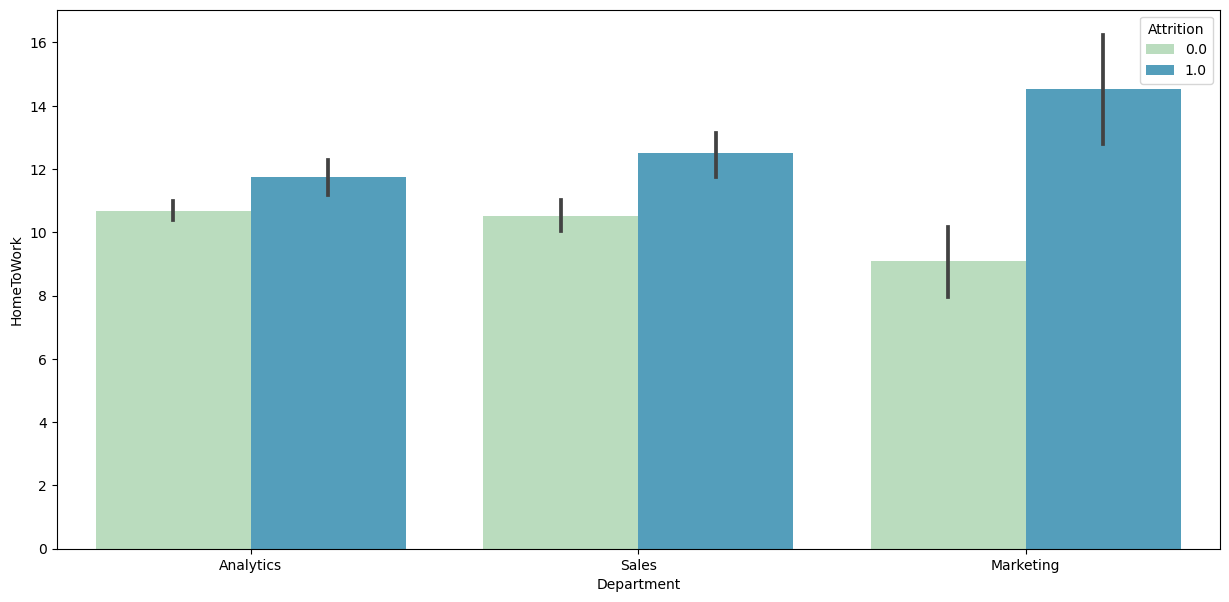

In [60]:
plt.figure(figsize=(15,7))
sns.barplot(x='Department',y='HomeToWork',data=df_train,hue='Attrition',palette=pal_2)

<AxesSubplot:xlabel='EducationField', ylabel='HourlnWeek'>

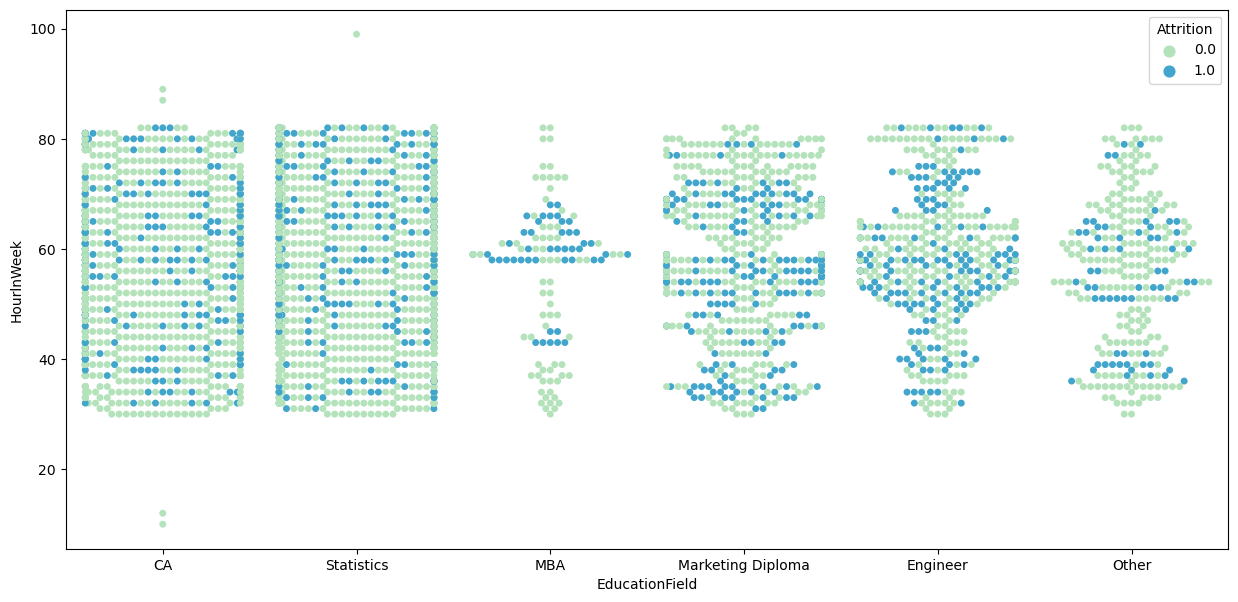

In [61]:
plt.figure(figsize=(15,7))
sns.swarmplot( x="EducationField", y='HourlnWeek',data=df_train,hue='Attrition',palette=pal_2)

<AxesSubplot:xlabel='EducationField', ylabel='HourlnWeek'>

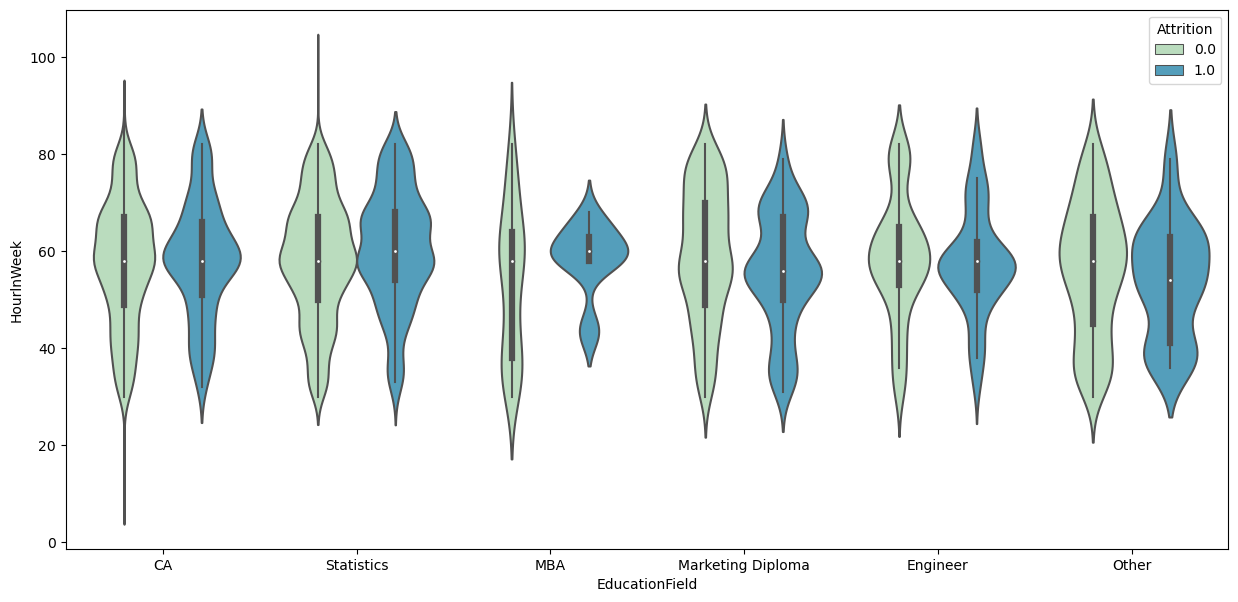

In [62]:
plt.figure(figsize=(15,7))
sns.violinplot( x="EducationField", y='HourlnWeek',data=df_train,hue='Attrition',palette=pal_2)

<AxesSubplot:xlabel='Designation', ylabel='WorkExperience'>

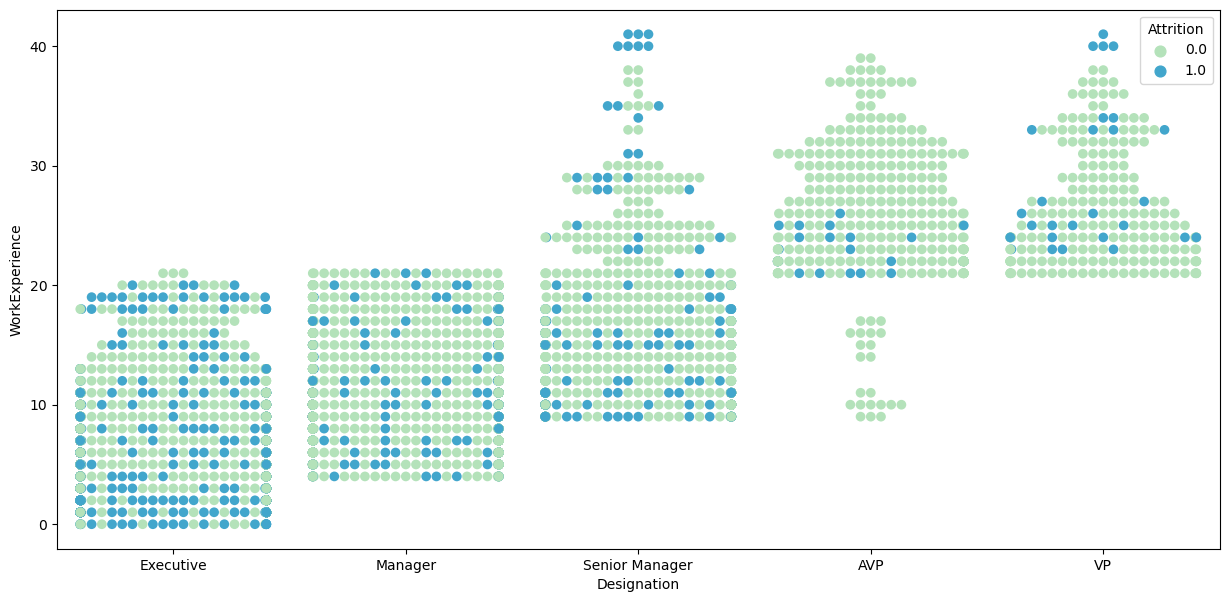

In [63]:
plt.figure(figsize=(15,7))
sns.swarmplot( x="Designation", y='WorkExperience',data=df_train,hue='Attrition',size=7,palette=pal_2)

<AxesSubplot:xlabel='TravelProfile', ylabel='MonthlyIncome'>

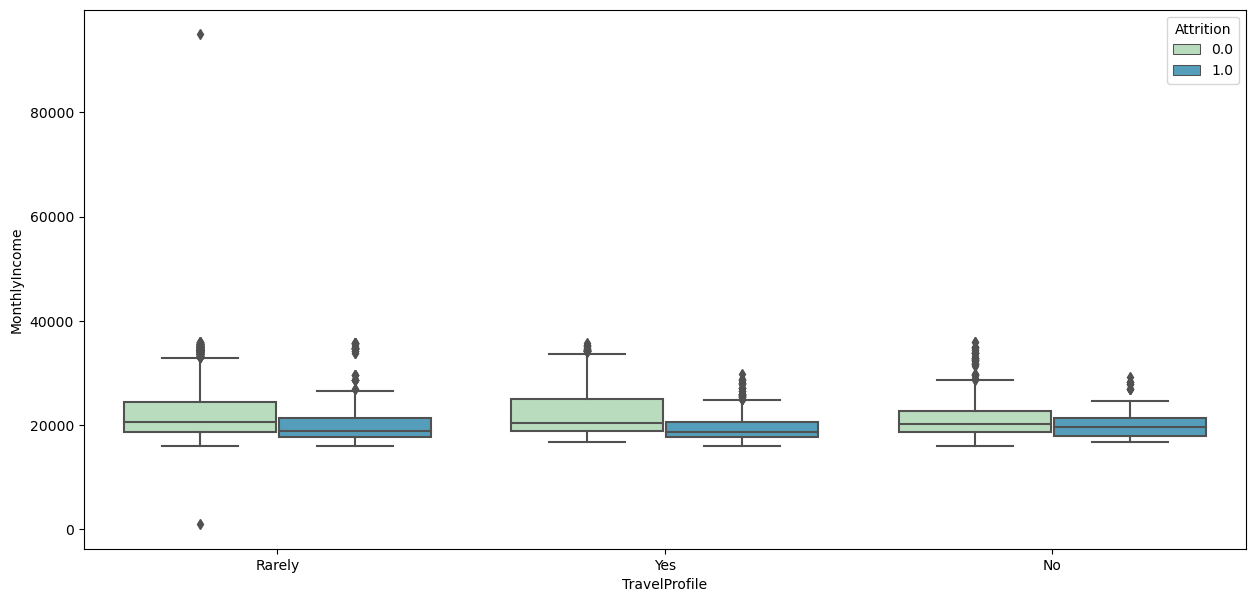

In [64]:
plt.figure(figsize=(15,7))
sns.boxplot(x='TravelProfile',y='MonthlyIncome',data=df_train,hue='Attrition',palette=pal_2)

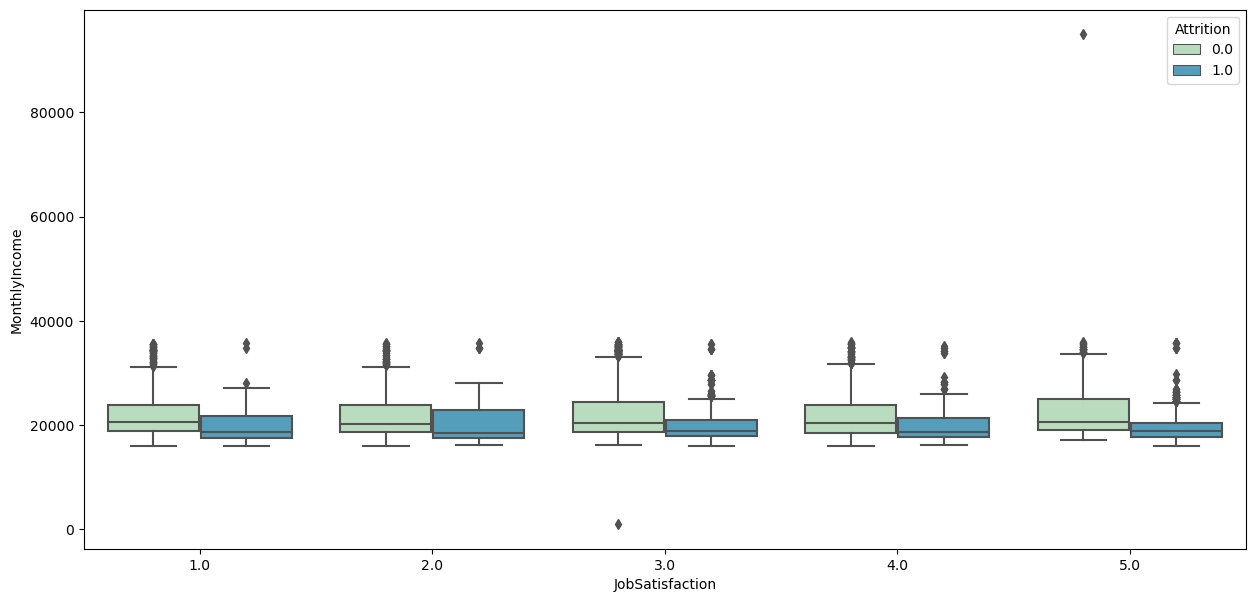

In [65]:
plt.subplots(figsize=(15,7))
sns.boxplot(x='JobSatisfaction',
             y='MonthlyIncome',
             data=df_train,              
             hue='Attrition',palette=pal_2)
plt.show()

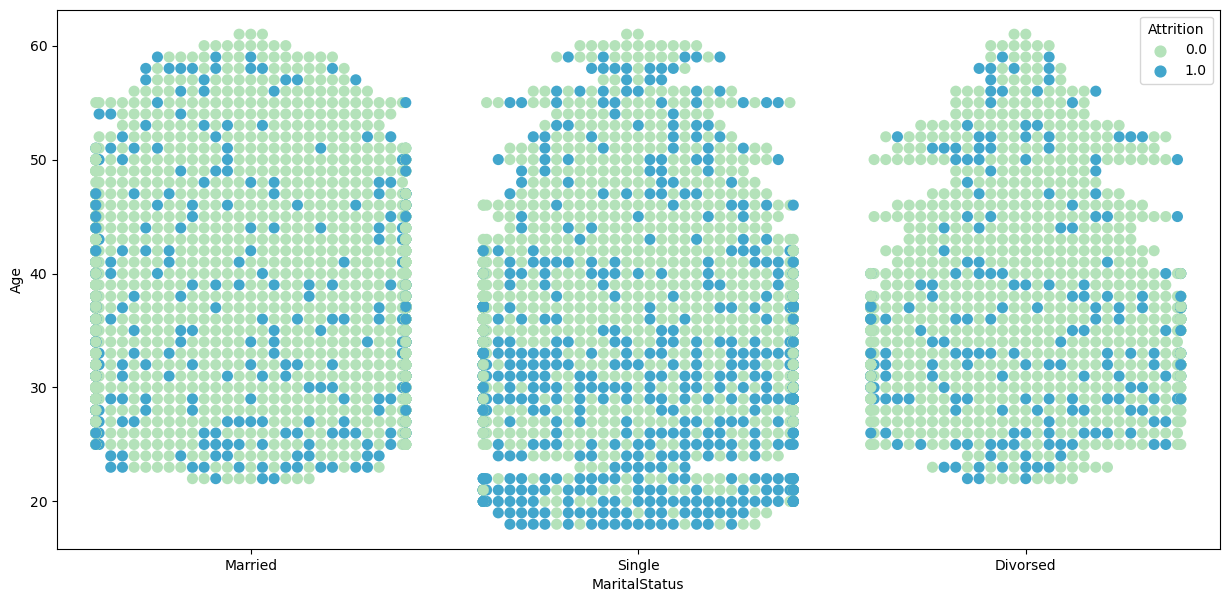

In [66]:
plt.subplots(figsize=(15,7))

sns.swarmplot(x='MaritalStatus',
             y='Age',
             data=df_train,
             hue='Attrition',
             size=8,palette=pal_2)
plt.show()

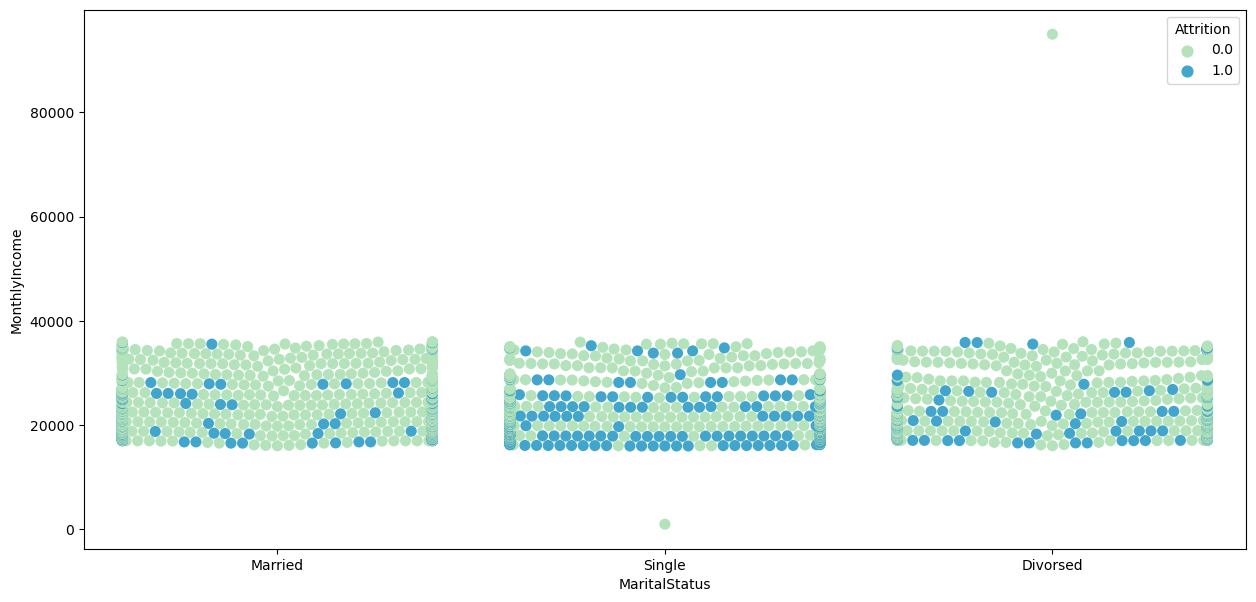

In [67]:
plt.subplots(figsize=(15,7))
sns.swarmplot(x='MaritalStatus',
             y='MonthlyIncome',
             data=df_train,
             hue='Attrition',
             size=8,palette=pal_2)
plt.show()

## Preparing Test Data

In [68]:
df_test['Involvement'] = df_test['Involvement'].astype('object')
df_test['JobSatisfaction'] = df_test['JobSatisfaction'].astype('object')
df_test['WorkLifeBalance'] = df_test['WorkLifeBalance'].astype('object')
df_test['OverTime'] = df_test['OverTime'].astype('object')
df_test['ESOPs'] = df_test['ESOPs'].astype('object')

In [69]:
df_test.isna().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [70]:
df_test.skew()

EmployeeID            0.000000
Age                   0.361888
HomeToWork            1.539658
HourlnWeek           -0.179855
Involvement          -0.499560
WorkLifeBalance      -0.080629
JobSatisfaction      -0.145894
ESOPs                -0.019784
NumCompaniesWorked    1.119860
OverTime              0.723307
SalaryHikelastYear    0.830651
WorkExperience        1.137624
LastPromotion         1.886064
CurrentProfile        0.799955
MonthlyIncome         3.317546
dtype: float64

In [71]:
mean_age = df_test['Age'].mean()
df_test['Age'].fillna(mean_age,inplace=True)

In [72]:
df_test['Department'].value_counts()

Analytics    1675
Sales         792
Marketing     105
Name: Department, dtype: int64

In [73]:
mode_dept = df_test['Department'].mode()
df_test['Department'].fillna(mode_dept[0],inplace=True)

In [74]:
median_htw = df_test['HomeToWork'].median()
df_test['HomeToWork'].fillna(median_htw,inplace=True)

In [75]:
df_test.Gender.value_counts()

Male      1574
Female     682
F          344
Name: Gender, dtype: int64

In [76]:
df_test['Gender'].replace({'F':"Female"},inplace=True)

In [77]:
mode_gen = df_test['Gender'].mode()
df_test['Gender'].fillna(mode_gen[0],inplace=True)

In [78]:
mean_hiw = df_test['HourlnWeek'].mean()
df_test['HourlnWeek'].fillna(mean_hiw,inplace=True)

In [79]:
mode_desig = df_test['Designation'].mode()
df_test['Designation'].fillna(mode_desig[0],inplace=True)

In [80]:
median_skl = df_test['SalaryHikelastYear'].median()
df_test['SalaryHikelastYear'].fillna(median_skl,inplace=True)

In [81]:
median_wk = df_test['WorkExperience'].median()
df_test['WorkExperience'].fillna(median_wk,inplace=True)

In [82]:
median_lp = df_test['LastPromotion'].median()
df_test['LastPromotion'].fillna(median_lp,inplace=True)

In [83]:
median_cp = df_test['CurrentProfile'].median()
df_test['CurrentProfile'].fillna(median_cp,inplace=True)

In [84]:
median_mi = df_test['MonthlyIncome'].median()
df_test['MonthlyIncome'].fillna(median_mi,inplace=True)

In [85]:
for c in df_test.select_dtypes(include='object').columns:
    print(df_test[c].value_counts())

Rarely    1852
Yes        529
No         249
Name: TravelProfile, dtype: int64
Analytics    1733
Sales         792
Marketing     105
Name: Department, dtype: int64
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: EducationField, dtype: int64
Male      1604
Female    1026
Name: Gender, dtype: int64
3    1510
4     698
1     183
5     179
2      60
Name: Involvement, dtype: int64
4    575
5    553
3    504
1    501
2    497
Name: WorkLifeBalance, dtype: int64
Executive         1023
Manager            920
Senior Manager     391
AVP                179
VP                 117
Name: Designation, dtype: int64
3    803
5    520
4    511
1    451
2    345
Name: JobSatisfaction, dtype: int64
1    1328
0    1302
Name: ESOPs, dtype: int64
0    1762
1     868
Name: OverTime, dtype: int64
Single      933
Married     841
Divorsed    477
M           379
Name: MaritalStatus, dtype: int64


In [86]:
df_test['MaritalStatus'].replace({'M':"Married"},inplace=True)

In [92]:
df_test.to_csv('test.csv')

In [93]:
# Reading Source Files and getting their paths.
sourcefile = pd.read_csv('train.csv')
sourcefile_test = pd.read_csv('test.csv')

# Make a copy of the original sourcefile
Train_Data = sourcefile.copy()
Test_Data = sourcefile_test.copy()
ID = Train_Data['EmployeeID'].copy()
ID_test = []
ID_test=Test_Data['EmployeeID'].copy()
Train_Data.drop(['MonthlyIncome','WorkLifeBalance','ESOPs','JobSatisfaction'], axis=1, inplace=True)
Test_Data.drop(['MonthlyIncome','WorkLifeBalance','ESOPs','JobSatisfaction'], axis=1, inplace=True)
# Encoding
    # Training Data
Encode_obj = LabelEncoder()
for col in Train_Data.columns[1:]:
    if Train_Data[col].dtype == 'object': # Label Encoding for atmost two levels
        if len(list(Train_Data[col].unique())) <= 2: 
            Encode_obj.fit(Train_Data[col])
            Train_Data[col] = Encode_obj.transform(Train_Data[col])
    # Test Data
Encode_test = LabelEncoder()
for col in Test_Data.columns[1:]:
    if Test_Data[col].dtype == 'object':
        if len(list(Test_Data[col].unique())) <= 2:
            Encode_test.fit(Test_Data[col])
            Test_Data[col] = Encode_test.transform(Test_Data[col])
    # Converting rest of categorical variable to dummy
Train_Data = pd.get_dummies(Train_Data, drop_first=True)
Test_Data = pd.get_dummies(Test_Data, drop_first=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
    # Train
Data_col = list(Train_Data.columns)
Data_col.remove('Attrition')
for col in Data_col:
    Train_Data[col] = Train_Data[col].astype(float)
    Train_Data[[col]] = scaler.fit_transform(Train_Data[[col]])
Train_Data['Attrition'] = pd.to_numeric(Train_Data['Attrition'], downcast='float')
    # Test
Test_Col = list(Test_Data.columns)
for col in Test_Col:
    Test_Data[col] = Test_Data[col].astype(float)
    Test_Data[[col]] = scaler.fit_transform(Test_Data[[col]])

# Copying Target and ID
target = Train_Data['Attrition'].copy()

# Removing Target and redundant features

Train_Data.drop(['Attrition', 'EmployeeID',], axis=1, inplace=True)
Test_Data.drop(['EmployeeID'], axis=1, inplace=True)
from imblearn.over_sampling import  RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=1234)
X_balance, y_balance = ros.fit_resample(Train_Data, target)

# #Logistic Regression
# from sklearn.linear_model import LogisticRegression
# logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,max_iter=500, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0)
# print("Logistic Regression : ",cross_val_score(logmodel, Train_Data, target, cv=5, scoring='accuracy').mean())
# logmodel.fit(Train_Data,target)
# predictions_LR = logmodel.predict(Test_Data)

# #KNeighbors Classifier
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='brute',leaf_size=30, p=2, metric='minkowski')                       
# print("KNeighborsClassifier : ",cross_val_score(knn, Train_Data, target, cv=20, scoring='accuracy').mean())
# knn.fit(Train_Data,target)
# predictions_KNN = knn.predict(Test_Data)

# #Support Vector Machine
# SVM=SVC(C=1.0, kernel='linear', degree=1, gamma='auto', 
#         coef0=0.0, shrinking=True, probability=False, 
#         tol=0.001, cache_size=200, class_weight=None, 
#         verbose=False, max_iter=-1, decision_function_shape='ovo')
# #SVM=svm.SVC(kernel='linear', C=1)
# print("Support Vector Machine : ",cross_val_score(SVM, Train_Data, target, cv=150, scoring='accuracy').mean())
# SVM.fit(Train_Data,target)
# predictions_SVM = SVM.predict(Test_Data)

# Random Forest
RF = RandomForestClassifier()
print("Random Forest : ",cross_val_score(RF, X_balance, y_balance, cv=10, scoring='accuracy').mean())
RF.fit(X_balance, y_balance)
predictions_RF = RF.predict(Test_Data)


# XGB = XGBClassifier(eval_metric='error')
# print("XGBClassifier : ",cross_val_score(XGB, X_balance, y_balance, cv=10, scoring='accuracy').mean())
# XGB.fit(X_balance, y_balance)
# predictions_XGB = XGB.predict(Test_Data)

# # Decision Tree Classifier
# DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=50, min_samples_split=2, 
#                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#                              random_state=None)
# print("Decision Tree Classifier : ",cross_val_score(DTC, X_balance, y_balance, cv=10, scoring='accuracy').mean())
# DTC.fit(Train_Data,target)
# predictions_DTC = DTC.predict(Test_Data)

# # Neural Network- Multi-layer Perceptron Classifier
# MLP = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, 
#                     batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
#                     max_iter=2500, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False)

# print("Multi-layer Perceptron Classifier : ",cross_val_score(MLP, X_balance, y_balance, cv=50, scoring='accuracy').mean())
# MLP.fit(X_balance, y_balance)
# predictions_MLP = MLP.predict(Test_Data)


# # Gaussian Naive Bayes 
# NB = GaussianNB()
# print("Gaussian Naive Bayes : ",cross_val_score(NB, Train_Data, target, cv=10, scoring='accuracy').mean())
# NB.fit(Train_Data,target)
# predictions_NB = NB.predict(Test_Data)


Random Forest :  0.9153949129852744


In [94]:
#Output Generation

# Take the prediction value based on Classifier...
#predictions=np.asarray(predictions_LR)
#predictions=np.asarray(predictions_KNN)
# predictions=np.asarray(predictions_SVM)
predictions=np.asarray(predictions_RF)
#predictions=np.asarray(predictions_DTC)
# predictions=np.asarray(predictions_MLP)
#predictions=np.asarray(predictions_NB)



output=[]
output=np.asarray(output)
ID=np.asarray(ID_test)
temp= np.column_stack((ID_test, predictions))
output = np.append(output,temp)
output = np.reshape(output,(ID.shape[0],2))
np.savetxt('Submission.csv',output, fmt="%d", header='EmployeeID,Attrition',delimiter=",",comments='')
